In [20]:
pip install pandas matplotlib

     |████████████████████████████████| 12.4 MB 3.4 MB/s eta 0:00:01    |███████▌                        | 2.9 MB 3.4 MB/s eta 0:00:03     |█████████████                   | 5.0 MB 3.4 MB/s eta 0:00:03
     |████████████████████████████████| 90 kB 16.0 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 9.3 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import urllib.request, json 
import matplotlib

NAT_JSON_URL = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-andamento-nazionale.json"
NAT_TXT_URL = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"

with urllib.request.urlopen(NAT_JSON_URL) as url:
	data = json.loads(url.read().decode())


In [23]:
json_norm = pd.json_normalize(data, meta = ['data', 'nuovi_attualmente_positivi'])

In [24]:
df = pd.DataFrame.from_dict(data)

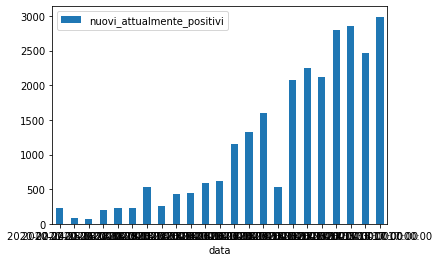

In [25]:
ax = df.plot.bar(x='data', y='nuovi_attualmente_positivi', rot=0)